### Plot Figure 2

In [1]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.backends.backend_pdf as pdf
import matplotlib.patches as pch

import eleanor_constants as EL

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
savename = "./figures/2.pdf"

- Print minimum and maximum values for all variables to make sure axes ranges is appropriate

In [2]:
df = pd.read_csv('./data/trajectories/summary/cleaned_animal_analyses.csv')

tests = ["A_median_conc", "E_median_conc", "A_c_speed", "E_c_speed"]
for test in tests:
    print(test, df[test].min(), df[test].max())

A_median_conc 1.018 67.64200000000001
E_median_conc 0.9865833333333334 83.65
A_c_speed -0.7437538759984417 1.151170393273323
E_c_speed -1.0599057243826673 1.2589523644848657


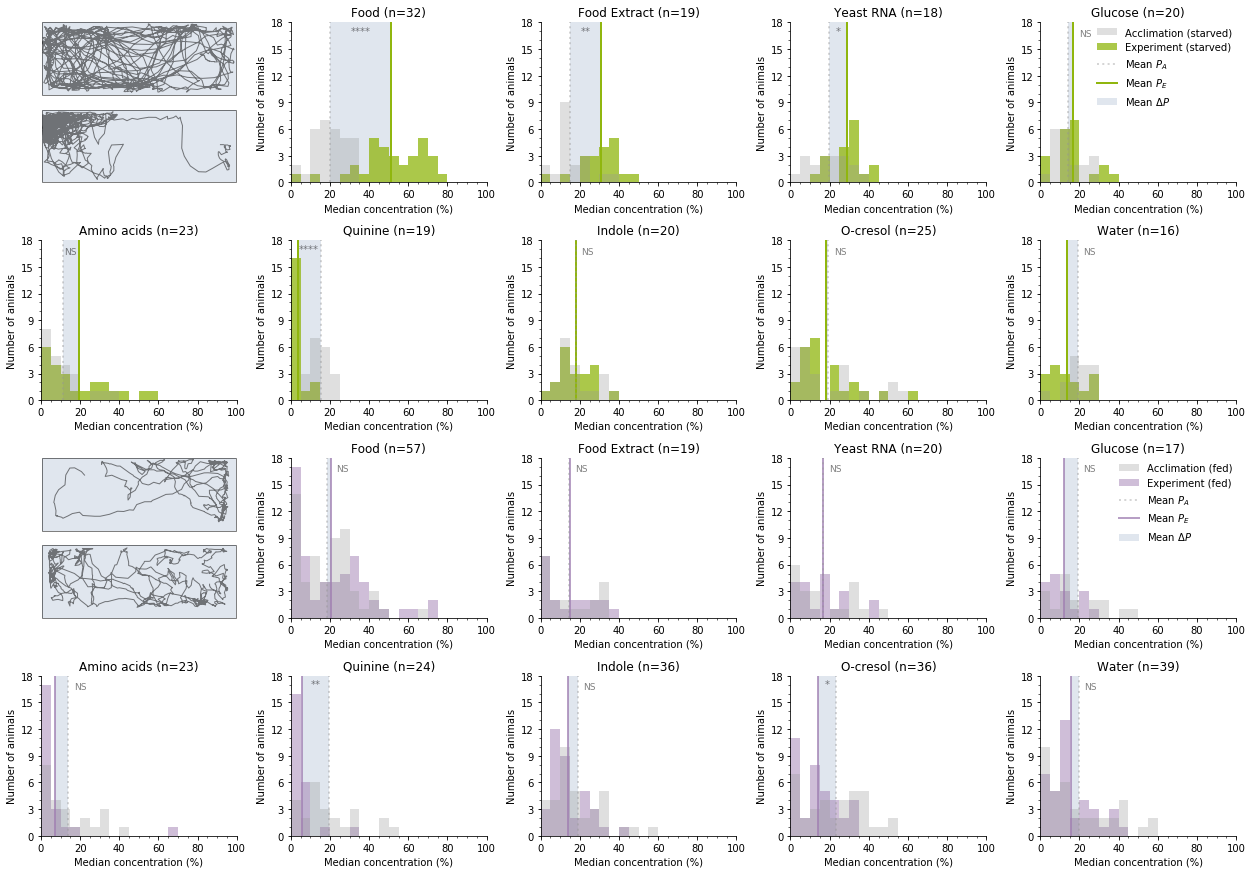

In [3]:
test = "median_conc"
labels = ["F", "FE", "Y", "G", "A", "Q", "I", "O", "W"]
titles = ["Food", "Food Extract", "Yeast RNA", 
          "Glucose", "Amino acids", "Quinine", 
          "Indole", "O-cresol", "Water"]
    
fig = plt.figure(figsize=(14*1.25, 12.25))
r, c = 4, 5
bins = np.arange(0, 101, 5)
pval_y = 17

# Double checked for revisions
ps = ["****", "**", "*", "NS", "NS", "****", "NS", "NS", "NS", 
      "NS", "NS", "NS", "NS", "NS", "**", "NS", "*", "NS"]

# Add Acclimation and Experiment plots
ax1 = fig.add_subplot(r, c, 1, aspect="equal", facecolor="None")
ygap = 6
ax1.set_ylim(30*2+ygap, 0)
ax1.set_xlim(0, 80)
ax1.axis("off")

animal_ID = "170428-02-top"
exp_df = pd.read_csv('./data/trajectories/video_calculations/' + animal_ID + '-experiment.csv')
acc_df = pd.read_csv('./data/trajectories/video_calculations/' + animal_ID + '-acclimate.csv')
ax1.add_patch(pch.Rectangle((0, 0), 80, 30, facecolor=EL.c_neutral, 
                            alpha=0.25, lw=0, edgecolor="none", clip_on=False))
ax1.add_patch(pch.Rectangle((0, 30+ygap), 80, 30, facecolor=EL.c_neutral, 
                            alpha=0.25, lw=0, edgecolor="none", clip_on=False))
e_xs, e_ys = exp_df["pos_x_mm"].values, exp_df["pos_y_mm"].values+30+ygap
a_xs, a_ys = acc_df["pos_x_mm"].values, acc_df["pos_y_mm"].values
ax1.plot(e_xs, e_ys, color='k', alpha=0.5, lw=1, clip_on=False)
ax1.plot(a_xs, a_ys, color='k', alpha=0.5, lw=1, clip_on=False)

ax1.add_patch(pch.Rectangle((0, 0), 80, 30, edgecolor="k", 
                            facecolor="none", alpha=0.5, lw=1, zorder=12, clip_on=False))
ax1.add_patch(pch.Rectangle((0, 30+ygap), 80, 30, edgecolor="k", 
                            facecolor="none", alpha=0.5, lw=1, zorder=12, clip_on=False))

# Add Acclimation and Experiment plots
ax2 = fig.add_subplot(r, c, 11, aspect="equal", facecolor="None")
ax2.set_ylim(30*2+ygap, 0)
ax2.set_xlim(0, 80)
ax2.axis("off")

animal_ID = "170517-03-bottom"
exp_df = pd.read_csv('./data/trajectories/video_calculations/' + animal_ID + '-experiment.csv')
acc_df = pd.read_csv('./data/trajectories/video_calculations/' + animal_ID + '-acclimate.csv')
ax2.add_patch(pch.Rectangle((0, 0), 80, 30, facecolor=EL.c_neutral, 
                            alpha=0.25, lw=0, edgecolor="none", clip_on=False))
ax2.add_patch(pch.Rectangle((0, 30+ygap), 80, 30, facecolor=EL.c_neutral, 
                            alpha=0.25, lw=0, edgecolor="none", clip_on=False))
e_xs, e_ys = exp_df["pos_x_mm"].values, exp_df["pos_y_mm"].values+30+ygap
a_xs, a_ys = acc_df["pos_x_mm"].values, acc_df["pos_y_mm"].values
ax2.plot(e_xs, e_ys, color='k', alpha=0.5, lw=1, clip_on=False)
ax2.plot(a_xs, a_ys, color='k', alpha=0.5, lw=1, clip_on=False)

ax2.add_patch(pch.Rectangle((0, 0), 80, 30, edgecolor="k", 
                            facecolor="none", alpha=0.5, lw=1, zorder=12, clip_on=False))
ax2.add_patch(pch.Rectangle((0, 30+ygap), 80, 30, edgecolor="k", 
                            facecolor="none", alpha=0.5, lw=1, zorder=12, clip_on=False))

axislist = [ax1]
p = 0

for i, label in enumerate(labels):
    treat = EL.treatments.get(label)
    temp = df[(df["A_treatment_odor"] == treat) & (df["A_starved"] == "1day")]
    acc = temp["A_"+test].values
    exp = temp["E_"+test].values

    ax = fig.add_subplot(r, c, i+2, facecolor="None")
    
    am = np.mean(acc)
    em = np.mean(exp)
    rect = pch.Rectangle((min(am, em), 0), abs(am-em), 100, label="Mean "+r"${\Delta P}$", 
                             alpha=0.25, facecolor=EL.c_neutral, edgecolor="none", lw=0)
    ax.add_patch(rect)
    ax.axvline(x=em, ymin=0, ymax=1, color=EL.c_starve, lw=2, label="Mean "+r"${P_{E}}$")
    ax.axvline(x=am, ymin=0, ymax=1, color=EL.c_acclimate, lw=2, alpha=0.4, ls="dotted", label="Mean "+r"${P_{A}}$")
    
    pval = ps[p]
    if abs(am-em)/2 > 4:
        x = min(am, em)+abs(am-em)/2
    else: 
        x = max(am, em)+6
    if pval == "NS":
        ax.text(x, pval_y-0.75, pval, alpha=0.5, 
                clip_on=False, ha="center", va="bottom", zorder=12, fontsize=9)
    else:
        ax.text(x, pval_y, pval, alpha=0.5, 
                clip_on=False, ha="center", va="center", zorder=12)
        
    ax.hist(exp, color=EL.c_starve, edgecolor='#ffffff', alpha=0.75, 
            lw=0, bins=bins, label="Experiment (starved)")
    ax.hist(acc, color=EL.c_acclimate, edgecolor='#ffffff', alpha=0.3, 
            lw=0, bins=bins, label="Acclimation (starved)")
    ax.set_title(titles[i]+ " (n="+str(len(acc))+")")
    axislist.append(ax)
    p += 1
    
axislist.append(ax2)

for n, label in enumerate(labels):
    treat = EL.treatments.get(label)
    temp = df[(df["A_treatment_odor"] == treat) & (df["A_starved"] == "no")]
    acc = temp["A_"+test].values
    exp = temp["E_"+test].values

    ax = fig.add_subplot(r, c, n+2+i+2, facecolor="None")
    
    am = np.mean(acc)
    em = np.mean(exp)
    rect = pch.Rectangle((min(am, em), 0), abs(am-em), 100, label="Mean "+r"${\Delta P}$",
                              alpha=0.25, facecolor=EL.c_neutral, edgecolor="none", lw=0)
    ax.add_patch(rect)
    ax.axvline(x=em, ymin=0, ymax=1, color=EL.c_fed, lw=2, alpha=0.75, label="Mean "+r"${P_{E}}$")
    ax.axvline(x=am, ymin=0, ymax=1, color=EL.c_acclimate, lw=2, alpha=0.4, ls="dotted", label="Mean "+r"${P_{A}}$")
    
    pval = ps[p]
    if abs(am-em)/2 > 4:
        x = min(am, em)+abs(am-em)/2
    else: 
        x = max(am, em)+6
    if pval == "NS":
        ax.text(x, pval_y-0.75, pval, alpha=0.5, 
                clip_on=False, ha="center", va="bottom", zorder=12, fontsize=9)
    else:
        ax.text(x, pval_y, pval, alpha=0.5, 
                clip_on=False, ha="center", va="center", zorder=12)
    
    ax.hist(exp, color=EL.c_fed, edgecolor='#ffffff', alpha=0.5,
            lw=0, bins=bins, label="Experiment (fed)")
    ax.hist(acc, color=EL.c_acclimate, edgecolor='#ffffff', alpha=0.3, 
            lw=0, bins=bins, label="Acclimation (fed)")
    ax.set_title(titles[n]+ " (n="+str(len(acc))+")")
    axislist.append(ax)
    p += 1

for i, ax in enumerate(fig.get_axes()):
    ax.set_xlabel(r"Median concentration (%)")
    if ax not in [ax1, ax2]:
        ax.set_xlim(0, 100)
        ax.set_ylim(0, 18)
        ax.set_xticks(bins, minor=True)
        ax.set_yticks(np.arange(0, 19, 3))
        ax.set_ylabel("Number of animals")
        ax.set_yticks(np.arange(0, 19, 1), minor=True)
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)

for i, ax in enumerate(axislist):
    if (i == 4) or (i == 14):
        handles, labels = ax.get_legend_handles_labels()
        labels, handles = zip(*sorted(zip(labels, handles), key=lambda t: t[0]))
        ax.legend(handles, labels, frameon=False, loc='upper right', 
                  handletextpad=0.75, bbox_to_anchor=(0, 0, 1.025, 1.025))

plt.tight_layout()
pp = pdf.PdfPages(savename, keep_empty=False)
pp.savefig(fig)
pp.close()
plt.show()